In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST Data

In [3]:
(X_train, y_train),(X_test,y_test) =  mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


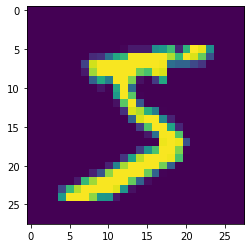

In [5]:
plt.imshow(X_train[0])

# Reshaping the DataSet

In [7]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [27]:
X_train.shape

(60000, 28, 28, 1)

# Type Conversion and Normalization

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

# One hot encoding

In [16]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [17]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [40]:
y_train.shape

(60000, 10)

# Model Architecture

In [46]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(10,kernel_size=(3, 3), activation = 'relu',input_shape = (28,28,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(16,kernel_size=(3, 3), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(10,kernel_size=(1, 1), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(tf.keras.layers.Conv2D(16,kernel_size=(3, 3), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))


model.add(tf.keras.layers.Conv2D(16,kernel_size=(3, 3), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))


model.add(tf.keras.layers.Conv2D(16,kernel_size=(3, 3), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(16,kernel_size=(3, 3), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))


model.add(tf.keras.layers.Conv2D(10,kernel_size=(4, 4)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Activation('softmax'))

In [47]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 batch_normalization_33 (Bat  (None, 26, 26, 10)       40        
 chNormalization)                                                
                                                                 
 dropout_33 (Dropout)        (None, 26, 26, 10)        0         
                                                                 
 conv2d_50 (Conv2D)          (None, 24, 24, 16)        1456      
                                                                 
 batch_normalization_34 (Bat  (None, 24, 24, 16)       64        
 chNormalization)                                                
                                                                 
 dropout_34 (Dropout)        (None, 24, 24, 16)      

# Optimizer and Learning Rate Scheduler

In [48]:
y_test.shape

(10000, 10)

In [49]:
X_test.shape

(10000, 28, 28, 1)

In [53]:
# Learning Rate Scheduler

# Learning Rate = Learning Rate * 1/(1 + decay * epoch)
def scheduler(epoch,lr):
  return round(0.003 * 1 / (1+0.319 * epoch),10)

def exponential_decay(lr,s):
  def exponential_decay_fn(epoch):
    return lr * 0.1 **(epoch /s)
  return exponential_decay_fn

model.compile(loss = tf.keras.metrics.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(lr=0.003),metrics = ['accuracy'])
model.fit(X_train,y_train, batch_size = 128,epochs = 20,verbose =1 , validation_data =(X_test,y_test),callbacks = [tf.keras.callbacks.LearningRateScheduler(scheduler,verbose=1)])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



Epoch 1: LearningRateScheduler setting learning rate to 0.003.
Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.0223 - accuracy: 0.9928 - val_loss: 0.0240 - val_accuracy: 0.9914 - lr: 0.0030

Epoch 2: LearningRateScheduler setting learning rate to 0.0022744503.
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.0207 - val_accuracy: 0.9934 - lr: 0.0023

Epoch 3: LearningRateScheduler setting learning rate to 0.0018315018.
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0173 - accuracy: 0.9942 - val_loss: 0.0191 - val_accuracy: 0.9934 - lr: 0.0018

Epoch 4: LearningRateScheduler setting learning rate to 0.0015329586.
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.0184 - val_accuracy: 0.9941 - lr: 0.0015

Epoch 5: LearningRateScheduler setting learning rate to 0.0013181019.
Epoch 5/20
469/469 [===========

In [54]:
score = model.evaluate(X_test,y_test,verbose=0)

In [55]:
score

[0.018569910898804665, 0.9944000244140625]

# Exponential Scheduling

In [57]:
exponential_decay_fn = exponential_decay(lr = 0.01,s=20)
model.fit(X_train,y_train, batch_size = 128,epochs = 20,verbose =1 , validation_data =(X_test,y_test),callbacks = [tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn,verbose=1)])


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0581 - accuracy: 0.9826 - val_loss: 0.0401 - val_accuracy: 0.9884 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.008912509381337455.
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.0347 - val_accuracy: 0.9895 - lr: 0.0089

Epoch 3: LearningRateScheduler setting learning rate to 0.007943282347242816.
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0285 - accuracy: 0.9911 - val_loss: 0.0354 - val_accuracy: 0.9898 - lr: 0.0079

Epoch 4: LearningRateScheduler setting learning rate to 0.0070794578438413795.
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0258 - accuracy: 0.9917 - val_loss: 0.0210 - val_accuracy: 0.9936 - lr: 0.0071

Epoch 5: LearningRateScheduler setting learning rate to 0.006309573444801933.
